# 1. NATURAL LANGUAGE PROCESSING


The goal of NLP is to deal with interactions between humans and computer using Natural Language. It is broadly defined as the automatic manipulation of natural language and also used to make the text analyzable. The ultimate objective of NLP is to read, decipher, understand, and make sense of the human languages in a manner that is valuable.

![title](images/nlp_intro.png)

# 2. WHY NATURAL LANGUAGE PROCESSING

Natural Language Processing is a very old field and has grown rapidly with the advancement of technology, particulary because of the evolution of Big Data. Since the last decade we have seen an exponential amount of increase in data volumes. Text is almost everywhere, all of your documents, online blogs, every single website on internet is a combination of 70-80% text and 20-30% images. 

![title](images/annual_size_of_data.png)

## 2.1 - Applications of NLP

NLP is the need of almost every industry. Each second millions of GBs of new text is generated in the world. There are tons of Industrial Applications of NLP:

1. Chat-bots
2. Sentiment Analysis
3. Text Summarization
4. Fake Text Detection
5. Spam Emails
6. Text classification
7. Bots Solving Question Answering Problems
8. Search Enginer Optimization Tags
9. Image to Captions
10. Audio to Text Mapping
11. Machine Translation
12. Text Recommendation in Mobile Keyboards

There are hundreds and thousands of more applications of NLP that can be named. Almost every application is either using NLP or has the prospect to have NLP integrated it with.

![title](images/nlp_applications.jpg)

# 3. CHALLENGE OF NATURAL LANGUAGE

Dealing with textual data is one of the most difficult and complex task of Machine Learning and Information Retrieval. Quoting a secion from **Neural Network Methods in Natural Language Processing, 2017.**

<blockquote>"Human language is highly ambiguous … It is also ever changing and evolving. People are great at producing language and understanding language, and are capable of expressing, perceiving, and interpreting very elaborate and nuanced meanings. At the same time, while we humans are great users of language, we are also very poor at formally understanding and describing the rules that govern language."</blockquote>

Natural Language is basically complex because it is messy.

## 3.1 - Machines Interpreting Text

Besides the complexity of understanding the contextual, syntactic, semantic and ambiguities of text. The biggest question is how are we gonna make our machines understand text. Text is just a Byte string and computers are only good at understanding numbers and patterns. Now the biggest question is how machines are going to understand all these complexities of Language using these RAW STRINGS.

![title](images/text_and_machines.jpeg)

# 4. CASE STUDY: FAKE INFORMATION

Internet is one of the most important thing of this century. Whenever or whatever you think or looking for is just one search away. There is tons of information available at the websites. There are millions of blogs, wikis, social media platforms, and other reference websites for any kind of thing you are looking for. But with all big things comes its own problems. One of the biggest issue is that there is no check and balance of information available at Internet. This issue particularly matters a lot when it comes to NEWS data. News builds a persons opinion and awareness, So it is really important to have this evaluated.

## 4.1 - Fake News dataset

I have picked a similar problem to this and found a related dataset at Kaggel: https://www.kaggle.com/mrisdal/fake-news . 

The dataset contains text and metadata from 244 websites and represents 12,999 posts in total from the past 30 days. The data was pulled using the webhose.io API; because it's coming from their crawler, not all websites identified by the BS Detector are present in this dataset. Each website was labeled according to the BS Detector as documented here. Data sources that were missing a label were simply assigned a label of "bs". There are (ostensibly) no genuine, reliable, or trustworthy news sources represented in this dataset (so far), so don't trust anything you read.


### Imports

Let's start with our imports. Here we are importing TensorFlow to build a deep learning model.

gensim library for text cleaning and loading word_emebddings

pandas for reading data file and analysis

In [1]:
import tensorflow as tf
import pandas as pd
import gensim
import numpy as np
import nltk

from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors
from gensim.models.word2vec import Text8Corpus

### Loading Data
Lets start with loading and analysis of data:

In [2]:
fake_news = pd.read_csv("fake.csv")
fake_news.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


### Analysis of Data

pandas describe functions gives you a basic analysis of the numerical columns avaialble in your dataset.

In [3]:
fake_news.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [4]:
top_authors = 100
fake_news.groupby("author").count()[["uuid"]].sort_values(by="uuid", ascending=False).reset_index().rename(columns={"uuid": "number_of_news"})[:top_authors]

,author,number_of_news
0,admin,247
1,Pakalert,100
2,Gillian,100
3,Editor,100
4,Eddy Lavine,100
...,...,...
95,J.E. Dyer,23
96,voltairenet.org,23
97,Tomás Fuentes,22
98,# 1 NWO Hatr,22


In [5]:
fake_news = fake_news[["text", "spam_score"]]

### Remove Very Short Size News

Lets remove all the news from dataset which are very short in length, since with a limited text our machine will not be able to build a better understanding:

In [6]:
fake_news = fake_news[fake_news.text.str.len() > 100]

### Pandas Histogram function

Pandas histogram function is a very useful function to do a histogram analysis. It automatically generates the histograms for all the numerical data in your dataset:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f826fca9588>]],
      dtype=object)

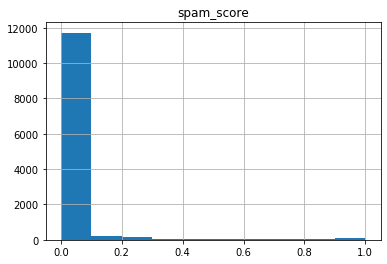

In [7]:
fake_news.hist()

### Class Unbalanced

It can be seen that there exists a very high unbalancing between spam and non-spam news. In order to solve it, for simplicity lets reduce (under-sample) our non-spam news dataset:

In [8]:
pick_good_news_sample = 0.05

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f826f988358>]],
      dtype=object)

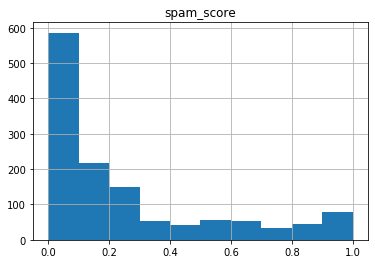

In [9]:
pd.concat([fake_news[fake_news.spam_score < 0.1].sample(frac=pick_good_news_sample), fake_news[fake_news.spam_score >= 0.1]], ignore_index=True).sample(frac=1).hist()

In [10]:
final_data = pd.concat([fake_news[fake_news.spam_score < 0.1].sample(frac=pick_good_news_sample), fake_news[fake_news.spam_score >= 0.1]], ignore_index=True).sample(frac=1)
final_data.head()

,text,spam_score
1063,The storm before the calm before the storm • S...,0.608
1144,What Lessons America Can Learn From This Elect...,0.953
1092,New Heavy-Duty Voting Machine Allows Americans...,0.384
660,"By Daily News Bin | November 3, 2016 | 2 947 S...",0.200
861,Страна: Ирак Как отмечает в своей новой статье...,0.219


## 4.2 - Text Analysis

So far we only have done a general data analysis, but we still have the main issue of dealing with text. Lets start step-by-step analysis of Text:

### 4.2.1 - Stopwords

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”, "and"). They are highly frequent words and don't have any definitive meaning. Famous libraries for NLP like NLTK, SpaCy, and gensim provides us with a set of stopwords to remove:


In [11]:
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words("english"))

### 4.2.2 - Frequency Analysis on whole corpus

A raw text is a combination of multiple sentences and each sentence is compromised of multiple tokens and words. It is important to do a frequency analysis of our corpus to see what other words besides stopwords are coming very frequently. This helps you to build up an intution about the domain and understanding about your dataset

#### 4.2.2.1 - Regex

A regular expression (also sometimes called a rational expression) is a special set of characters that define a Search Pattern.

For example if we need to only pick valid character words from our corpus we can use this regex pattern: "[a-zA-Z]{2,}"

#### 4.2.2.2 - N-grams

A word token can be a uni-gram, bi-gram, tri-gram or an N-gram. N-grams are conceptual units. 

e.g. New York is a bi-gram and it only makes sense when new and york are combined as 1 unit. 

### Get Into Code:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


total_corpus = " ".join(final_data["text"].tolist())

vectorizer = CountVectorizer(analyzer='word', min_df=1, stop_words="english", 
                             token_pattern="[a-zA-Z]{3,}", ngram_range=(1, 2))
X = vectorizer.fit_transform([total_corpus])

Lets see in how many tokens our corpus has been tokenized using the applied regex:

In [13]:
len(vectorizer.get_feature_names())

340275

In [14]:
from collections import Counter
word_freq = Counter(dict(zip(vectorizer.get_feature_names(), list(X.toarray()[0, :]))))

In [15]:
word_freq.most_common(50)

[('trump', 2738),
 ('clinton', 2092),
 ('people', 1640),
 ('hillary', 1613),
 ('said', 1521),
 ('new', 1323),
 ('just', 1281),
 ('like', 1203),
 ('time', 1109),
 ('president', 1045),
 ('election', 1006),
 ('russia', 1003),
 ('state', 981),
 ('world', 905),
 ('states', 883),
 ('government', 862),
 ('american', 856),
 ('war', 812),
 ('obama', 811),
 ('media', 791),
 ('hillary clinton', 759),
 ('news', 753),
 ('donald', 710),
 ('years', 708),
 ('country', 688),
 ('political', 673),
 ('donald trump', 672),
 ('united', 666),
 ('russian', 652),
 ('campaign', 650),
 ('america', 631),
 ('way', 624),
 ('know', 609),
 ('military', 605),
 ('year', 605),
 ('right', 590),
 ('day', 579),
 ('make', 571),
 ('going', 564),
 ('think', 555),
 ('united states', 540),
 ('white', 536),
 ('que', 535),
 ('did', 530),
 ('national', 526),
 ('don', 524),
 ('americans', 520),
 ('presidential', 510),
 ('washington', 506),
 ('fbi', 494)]

## Train-Test Split

Before moving forward lets split our dataset into train and test in order to train a prediction model and its evaluation. Lets pick a 15% test dataset and keep 85% for training:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_data["text"].values, final_data["spam_score"].values, test_size=0.15, random_state=10)

## 4.3 - Text Representation

Machine Learning models only understand numerical values in order to learn models and perform computations. We need to convert our textual information in some kind of numerical representations so that we can train a predictive model for this task. There are 2 common-methods to represent our text in numerical values:

1. Bag of Words Model
2. Word Vectors

### 4.3.1 - Bag of Words Model

In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 

Lets use one of the most common, effective and famous bag of words model: **tf-idf**

### 4.3.1.1 - tf-idf

A tf-idf model represents your dataset in the form of a DOCUMENTxWORD_TOKENS matrix. Each corresponding value is calculated usign the formula tf*idf.

1. tf: Number times a word_token comes in a particular document/news
2. df: Number of times a word_token comes in the documents
3. idf: inverse of document frequence (1/df)


In our case, document is each nexs text and term frequency is calculated based on the number of times a word comes within that text


![title](images/tf_idf_matrix.png)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(analyzer='word', min_df=5, stop_words="english",
                                    token_pattern="[a-zA-Z]{3,}", ngram_range=(1, 3))

X_train_tfidf = tf_idf_vectorizer.fit_transform(X_train)
X_train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Define and Compile the Neural Network

Lets define a very simple neural netwrok to solve this task:

![title](images/basic_neural_network_prob_1.png)


In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(3, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(2, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Dense:** Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, like tanh, relu, sigmoid and many more.


Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

In [19]:
model.compile(optimizers="sgd", loss="mean_squared_error", metrics=['accuracy'])

### Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the model.fit call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [20]:
model.fit(X_train_tfidf.todense(), y_train, epochs=10)

Train on 1117 samples
Epoch 1/10
1117/1117 [==============================] - 1s 690us/sample - loss: 0.1326 - accuracy: 0.4145
Epoch 2/10
1117/1117 [==============================] - 0s 102us/sample - loss: 0.1042 - accuracy: 0.4199
Epoch 3/10
1117/1117 [==============================] - 0s 108us/sample - loss: 0.0919 - accuracy: 0.4199
Epoch 4/10
1117/1117 [==============================] - 0s 104us/sample - loss: 0.0858 - accuracy: 0.4199
Epoch 5/10
1117/1117 [==============================] - 0s 103us/sample - loss: 0.0821 - accuracy: 0.4199
Epoch 6/10
1117/1117 [==============================] - 0s 104us/sample - loss: 0.0790 - accuracy: 0.4199
Epoch 7/10
1117/1117 [==============================] - 0s 106us/sample - loss: 0.0758 - accuracy: 0.4199
Epoch 8/10
1117/1117 [==============================] - 0s 102us/sample - loss: 0.0721 - accuracy: 0.4199
Epoch 9/10
1117/1117 [==============================] - 0s 101us/sample - loss: 0.0678 - accuracy: 0.4199
Epoch 10/10
1117/1117 [=

### Evaluating your Model

Once we have trained our model on a specific dataset, now the most important goal is to evaluate our trained model on the test dataset to make sure if it can now perform good on unseen data as well:

In [21]:
X_test_tfidf = tf_idf_vectorizer.transform(X_test)
X_train_tfidf.todense().shape

(1117, 12043)

In [22]:
test_loss, test_acc = model.evaluate(X_test_tfidf.todense(), y_test, verbose=0)
print("Loss: ", test_loss*100, " | ", "Accuracy: ", test_acc*100)

Loss:  9.070580430103071  |  Accuracy:  38.88888955116272


### 4.3.1 - Word Vectors

Word-Vectors is a dense representation of words in the form of numeric vectors. It can be learned using a variety of language models.

![title](images/word_2_vec_example.png)

You can downlaod using GoogleNews Vectors using the following commands in your LinuxOS shell: 

brew install wget

wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [23]:
from gensim.models import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format("/home/rayyan/Projects/KYAK/Data/google_news_vectors/GoogleNews-vectors-negative300.bin", binary=True)

In [24]:
def text_to_vec(text):
    text_vec = np.sum(np.array([word_vectors[word] for word in text.split() if word in word_vectors.vocab]), axis=0)
    if type(text_vec) is np.float64:
        return pd.Series([0 for val in range(300)])

    return pd.Series(text_vec)

In [25]:
vec_cols = [str(val) for val in range(300)]
for v_c in vec_cols:
    final_data[v_c] = 0
final_data[vec_cols] = final_data.text.apply(text_to_vec)

In [26]:
final_data.head()

,text,spam_score,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
1063,The storm before the calm before the storm • S...,0.608,8.374574,8.622639,4.300964,9.244730,-4.353531,-8.544533,-0.882080,-11.943550,...,-9.493273,-10.428246,-22.988541,3.305084,4.089558,-9.668156,-3.452728,-7.243034,3.833265,-2.418930
1144,What Lessons America Can Learn From This Elect...,0.953,8.519592,5.978402,5.369186,16.759216,-10.465744,-1.090652,7.388054,-9.830246,...,-14.213850,-0.607891,-14.762993,-0.198021,-6.634659,-6.770321,-0.042440,-3.687212,5.635551,-4.302097
1092,New Heavy-Duty Voting Machine Allows Americans...,0.384,8.402206,10.366974,-2.172836,2.865843,-8.216553,-1.899935,-1.428459,-13.520512,...,-13.197464,-12.738144,-22.096054,-1.872210,-3.452843,-9.886845,0.684963,-9.567497,3.004120,-6.191963
660,"By Daily News Bin | November 3, 2016 | 2 947 S...",0.200,8.767174,9.646676,9.507690,12.123718,-18.586260,-7.115929,5.289146,-12.252220,...,-20.705093,-3.308319,-19.682428,9.614758,-7.791946,-3.699747,3.111159,-0.965698,9.978531,-3.822708
861,Страна: Ирак Как отмечает в своей новой статье...,0.219,0.036377,-1.706888,0.910156,0.396240,-1.113708,0.896606,1.082916,-0.494751,...,0.700562,1.233398,-1.367432,-0.323242,0.426849,-1.473541,-3.104736,-0.072449,-0.042725,3.070801


## Train-Test Split

Before moving forward lets split our dataset into train and test in order to train a prediction model and its evaluation. Lets pick a 15% test dataset and keep 85% for training:

In [27]:
X_train_word_vec, X_test_word_vec, y_train_word_vec, y_test_word_vec = train_test_split(final_data[vec_cols].values, final_data["spam_score"].values, test_size=0.15, random_state=10)

In [44]:
X_train_word_vec.shape

(1117, 300)

### Training and Compling Model

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(3, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(2, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [36]:
model.compile(optimizers="sgd", loss="mean_squared_error", metrics=['accuracy'])

In [41]:
model.fit(X_train_word_vec, y_train_word_vec, epochs=10)

Train on 1117 samples
Epoch 1/10
1117/1117 [==============================] - 0s 47us/sample - loss: 0.0879 - accuracy: 0.4199
Epoch 2/10
1117/1117 [==============================] - 0s 40us/sample - loss: 0.0879 - accuracy: 0.4199
Epoch 3/10
1117/1117 [==============================] - 0s 38us/sample - loss: 0.0878 - accuracy: 0.4199
Epoch 4/10
1117/1117 [==============================] - 0s 38us/sample - loss: 0.0877 - accuracy: 0.4199
Epoch 5/10
1117/1117 [==============================] - 0s 40us/sample - loss: 0.0878 - accuracy: 0.4199
Epoch 6/10
1117/1117 [==============================] - 0s 39us/sample - loss: 0.0876 - accuracy: 0.4199
Epoch 7/10
1117/1117 [==============================] - 0s 42us/sample - loss: 0.0872 - accuracy: 0.4199
Epoch 8/10
1117/1117 [==============================] - 0s 42us/sample - loss: 0.0873 - accuracy: 0.4199
Epoch 9/10
1117/1117 [==============================] - 0s 35us/sample - loss: 0.0875 - accuracy: 0.4199
Epoch 10/10
1117/1117 [==========

### Model Evaluation

In [40]:
test_loss_vec, test_acc_vec = model.evaluate(X_test_word_vec, y_test_word_vec, verbose=0)
print("Loss: ", test_loss_vec*100, " | ", "Accuracy: ", test_acc_vec*100)

Loss:  9.978104081719813  |  Accuracy:  38.88888955116272
